<a href="https://colab.research.google.com/github/saimathura/deeplearning-MDSC302/blob/main/22233_Assignment_3_Kannada_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downlaoding the kaggle api

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saimathurakrishnan","key":"93f1782054d1d824aebb7eace9b87a9b"}'}

In [ ]:
! mkdir ~/.kaggle


In [ ]:


! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                          Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          12138        495  1.0              
nelgiriyewithana/global-youtube-statistics-2023                       Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           4164        146  1.0              
joebeachcapital/global-earth-temperatures                             Global Earth Temperatures                           33KB  2023-08-09 06:21:51            859         31  1.0              
arnavsmayan/netflix-userbase-datase

In [ ]:
!kaggle competitions download -c Kannada-MNIST

  0% 0.00/12.4M [00:00<?, ?B/s]
100% 12.4M/12.4M [00:00<00:00, 126MB/s]


# creating a custom DAtaset class

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
! mkdir train

In [ ]:
! unzip Kannada-MNIST.zip -d train

Archive:  Kannada-MNIST.zip
  inflating: train/Dig-MNIST.csv     
  inflating: train/sample_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


In [ ]:
import pandas as pd

In [ ]:

# class Kmnist(Dataset):
#     def __init__(self, df, transform=None, target_transform=None):
#         self.img_labels = df.iloc[:,0]
#         # self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.img_labels)

#     def __getitem__(self, idx):
#         img_path = os.path.join( self.img_labels.iloc[idx, 0])
#         image = read_image(df.drop(df.columns[0],axis=1).iloc[idx,:].values)
#         label = self.img_labels.iloc[idx, 0]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label

# Creating a custom class for the dataset

In [ ]:

class Kmnist(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.img_labels = df.iloc[:,0]
        # self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.df = df

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        #img_path = os.path.join( self.img_labels.iloc[idx, 0])
        image = (self.df.iloc[idx,1:].values)
        image = torch.tensor(image)
        label = self.img_labels.iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

#Loading train test validation dataset for training

In [ ]:
t_data = pd.read_csv('/content/train/train.csv')

In [ ]:
train_data = Kmnist(t_data)

In [ ]:
from torch.utils.data import random_split

In [ ]:
train_size = int(0.9 * (len(train_data)))

In [ ]:
val_size = len(train_data) - train_size

In [ ]:
train_set , val_set = random_split(train_data, [train_size, val_size])

In [ ]:
train_set.__len__()

54000

In [ ]:
val_set.__len__()


6000

In [ ]:
tt_data = pd.read_csv('/content/train/train.csv')

In [ ]:
test_data = Kmnist(tt_data)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dataloader = DataLoader(train_set,batch_size = 64,shuffle = True)
val_dataloader = DataLoader(val_set,batch_size = 64,shuffle = True)
test_dataloader = DataLoader(test_data,batch_size = 64,shuffle = True)

In [ ]:
train_features,train_labels = next(iter(train_dataloader))

#loading a random sample from training dataset and printing it as an image

Feature batch shape: torch.Size([64, 784])
Labels batch shape: torch.Size([64])


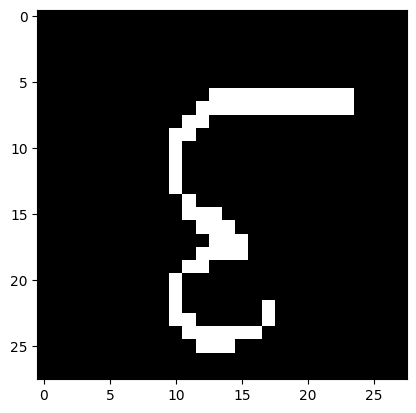

Label: 9


In [ ]:
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].reshape(28,28).squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
from torch import nn

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
import torch.nn.functional as F

In [ ]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,4096)#just a random Neural Network with 6 Hidden Layers
        self.fc2 = nn.Linear(4096,512)
        self.fc3 = nn.Linear(512,256)
        self.fc4 = nn.Linear(256,128)
        self.fc5 = nn.Linear(128,32)
        self.fc6 = nn.Linear(32,10)

    def forward(self,x):
        x = F.relu(self.fc1(x.float()))# using a common Activation Function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        output = F.softmax(self.fc6(x),dim = 1)# doing a softmax at the END
        return output


In [ ]:
model = net()# loading THe Model

In [ ]:
model.cuda()

net(
  (fc1): Linear(in_features=784, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=32, bias=True)
  (fc6): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
device = torch.device("cuda:0")
model.to(device)

net(
  (fc1): Linear(in_features=784, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=32, bias=True)
  (fc6): Linear(in_features=32, out_features=10, bias=True)
)

# defining the basic stochastic gradient descent optimizer model which we used for normal mnist

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
epochs = 10  # You can adjust the number of epochs as needed

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []# for plotting

# Training for 10 epochs

In [ ]:
for e in range(epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    train_total = 0
    val_correct = 0
    val_total = 0
    model.train()  # Set the model to training mode

    # Training loop
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for val_images, val_labels in val_dataloader:  # Assuming you have a DataLoader named 'val_loader'
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = model(val_images)
            val_loss += criterion(val_outputs, val_labels).item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    # Calculate average losses for this epoch
    average_train_loss = train_loss / len(train_dataloader)
    average_val_loss = val_loss / len(val_dataloader)
    train_accuracy = train_correct / train_total * 100
    val_accuracy = val_correct / val_total * 100
    average_train_accuracy = train_accuracy / len(train_dataloader)
    average_val_accuracy = val_accuracy / len(val_dataloader)

    train_losses.append(average_train_loss)
    val_losses.append(average_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{e+1}/{epochs}],Train Accuracy: {average_train_accuracy:.4f}, Val Accuracy: {average_val_accuracy:.4f}, Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}')

print("Training finished")

Epoch [1/10],Train Accuracy: 0.0927, Val Accuracy: 0.9257, Train Loss: 1.6912, Val Loss: 1.5945
Epoch [2/10],Train Accuracy: 0.1033, Val Accuracy: 0.9348, Train Loss: 1.5908, Val Loss: 1.5827
Epoch [3/10],Train Accuracy: 0.1041, Val Accuracy: 0.9397, Train Loss: 1.5830, Val Loss: 1.5786
Epoch [4/10],Train Accuracy: 0.1045, Val Accuracy: 0.9411, Train Loss: 1.5789, Val Loss: 1.5765
Epoch [5/10],Train Accuracy: 0.1048, Val Accuracy: 0.9418, Train Loss: 1.5759, Val Loss: 1.5744
Epoch [6/10],Train Accuracy: 0.1050, Val Accuracy: 0.9420, Train Loss: 1.5737, Val Loss: 1.5740
Epoch [7/10],Train Accuracy: 0.1052, Val Accuracy: 0.9454, Train Loss: 1.5719, Val Loss: 1.5720
Epoch [8/10],Train Accuracy: 0.1053, Val Accuracy: 0.9411, Train Loss: 1.5701, Val Loss: 1.5759
Epoch [9/10],Train Accuracy: 0.1055, Val Accuracy: 0.9450, Train Loss: 1.5686, Val Loss: 1.5718
Epoch [10/10],Train Accuracy: 0.1056, Val Accuracy: 0.9440, Train Loss: 1.5671, Val Loss: 1.5710
Training finished


# Plotting the train test accuracy and loss

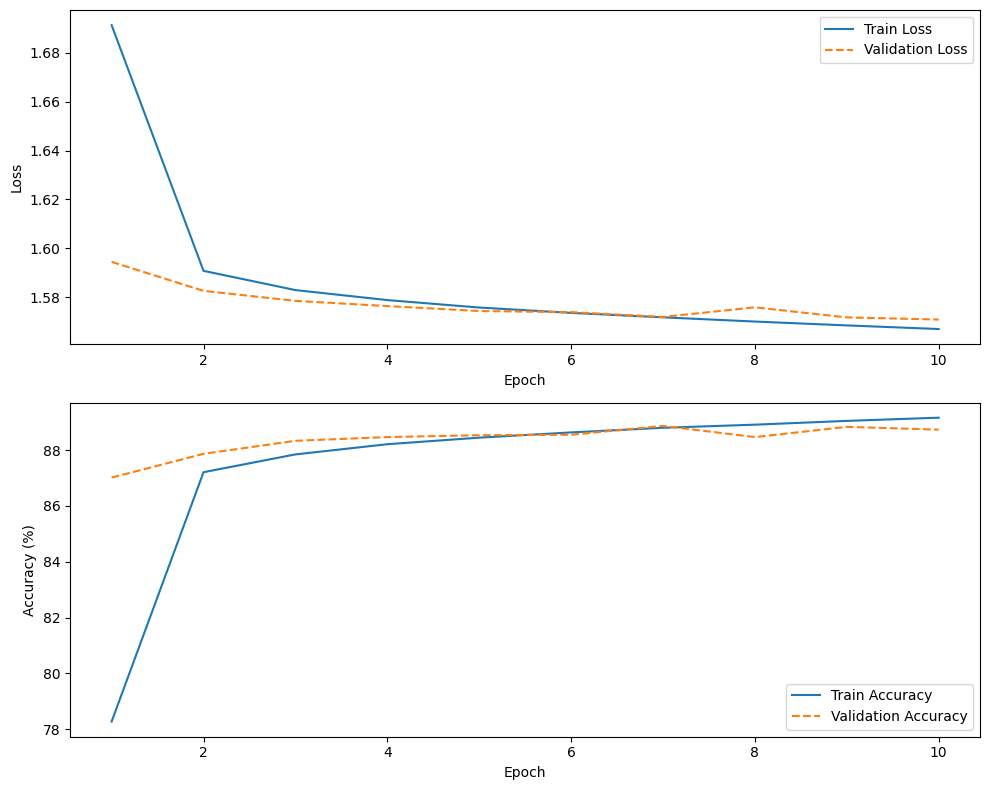

In [ ]:
# Plotting the loss and accuracy curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(range(1, epochs+1), train_losses, label='Train Loss')
ax1.plot(range(1, epochs+1), val_losses, label='Validation Loss', linestyle='dashed')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
ax2.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy', linestyle='dashed')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

plt.tight_layout()
plt.show()

# testing the model

# Ok well in testing our model performed decently it gave 89%

In [ ]:
model.eval()  # Set the model to evaluation mode
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for test_images, test_labels in test_dataloader:  # Assuming you have a DataLoader named 'test_loader'
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = model(test_images)
        test_loss += criterion(test_outputs, test_labels).item()
        _, test_predicted = torch.max(test_outputs, 1)
        test_total += test_labels.size(0)
        test_correct += (test_predicted == test_labels).sum().item()

average_test_loss = test_loss / len(test_dataloader)
test_accuracy = test_correct / test_total * 100

print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 1.5670, Test Accuracy: 89.17%


# using optimzer as Adam and the same  neural network from previous

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [ ]:
epochs = 10  # You can adjust the number of epochs as needed

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []# for plotting

In [ ]:
for e in range(epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    train_total = 0
    val_correct = 0
    val_total = 0
    model.train()  # Set the model to training mode

    # Training loop
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for val_images, val_labels in val_dataloader:  # Assuming you have a DataLoader named 'val_loader'
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = model(val_images)
            val_loss += criterion(val_outputs, val_labels).item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    # Calculate average losses for this epoch
    average_train_loss = train_loss / len(train_dataloader)
    average_val_loss = val_loss / len(val_dataloader)
    train_accuracy = train_correct / train_total * 100
    val_accuracy = val_correct / val_total * 100
    average_train_accuracy = train_accuracy / len(train_dataloader)
    average_val_accuracy = val_accuracy / len(val_dataloader)

    train_losses.append(average_train_loss)
    val_losses.append(average_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{e+1}/{epochs}],Train Accuracy: {average_train_accuracy:.4f}, Val Accuracy: {average_val_accuracy:.4f}, Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}')

print("Training finished")

Epoch [1/10],Train Accuracy: 0.1092, Val Accuracy: 1.0376, Train Loss: 1.5396, Val Loss: 1.4866
Epoch [2/10],Train Accuracy: 0.1159, Val Accuracy: 1.0362, Train Loss: 1.4836, Val Loss: 1.4874
Epoch [3/10],Train Accuracy: 0.1163, Val Accuracy: 1.0390, Train Loss: 1.4791, Val Loss: 1.4843
Epoch [4/10],Train Accuracy: 0.1165, Val Accuracy: 1.0417, Train Loss: 1.4776, Val Loss: 1.4824
Epoch [5/10],Train Accuracy: 0.1168, Val Accuracy: 1.0434, Train Loss: 1.4757, Val Loss: 1.4802
Epoch [6/10],Train Accuracy: 0.1171, Val Accuracy: 1.0410, Train Loss: 1.4730, Val Loss: 1.4824
Epoch [7/10],Train Accuracy: 0.1170, Val Accuracy: 1.0433, Train Loss: 1.4735, Val Loss: 1.4806
Epoch [8/10],Train Accuracy: 0.1169, Val Accuracy: 1.0465, Train Loss: 1.4742, Val Loss: 1.4776
Epoch [9/10],Train Accuracy: 0.1172, Val Accuracy: 1.0479, Train Loss: 1.4721, Val Loss: 1.4759
Epoch [10/10],Train Accuracy: 0.1171, Val Accuracy: 1.0495, Train Loss: 1.4729, Val Loss: 1.4748
Training finished


# we are getting a very high accuracy in validation set

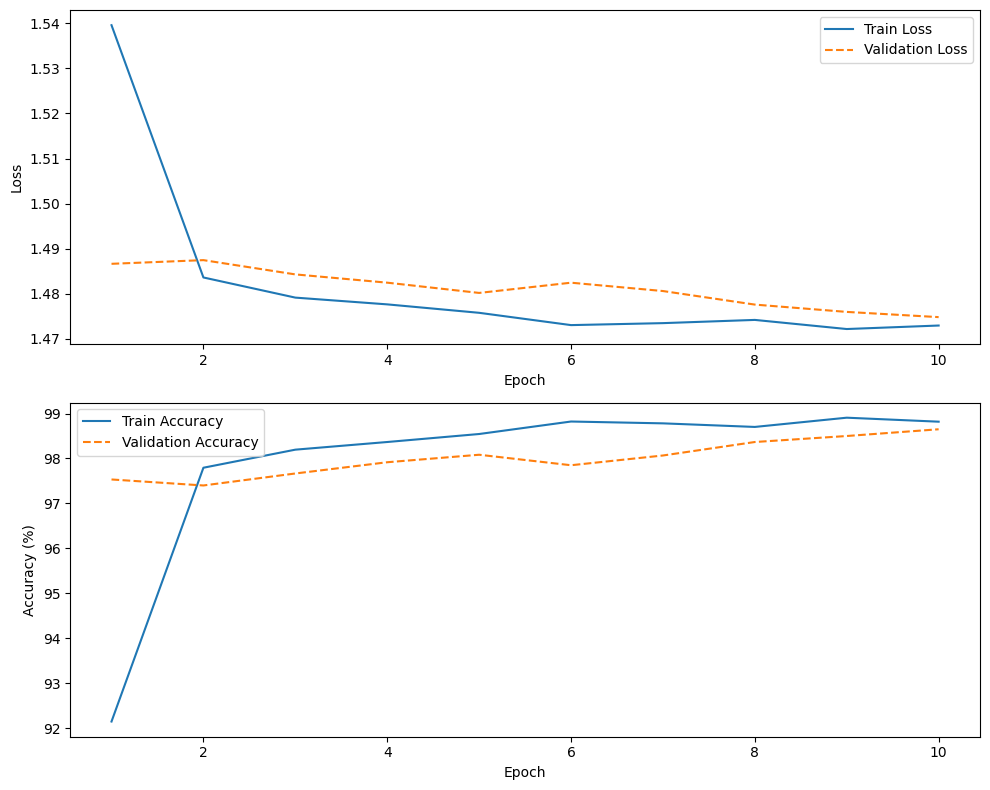

In [ ]:
# Plotting the loss and accuracy curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(range(1, epochs+1), train_losses, label='Train Loss')
ax1.plot(range(1, epochs+1), val_losses, label='Validation Loss', linestyle='dashed')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
ax2.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy', linestyle='dashed')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

plt.tight_layout()
plt.show()

# oh this time test  we got around 99.27% accuracy which is good

In [ ]:

model.eval()  # Set the model to evaluation mode
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for test_images, test_labels in test_dataloader:  # Assuming you have a DataLoader named 'test_loader'
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = model(test_images)
        test_loss += criterion(test_outputs, test_labels).item()
        _, test_predicted = torch.max(test_outputs, 1)
        test_total += test_labels.size(0)
        test_correct += (test_predicted == test_labels).sum().item()

average_test_loss = test_loss / len(test_dataloader)
test_accuracy = test_correct / test_total * 100

print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 1.4685, Test Accuracy: 99.27%


# but can we improve this little more? is there a possibility ? Let's Try

# class assignment as told with batch normalization

## implementing a neural network with batch normalization

# we are using batch normalization1d because batch norm2d need a matrix input

# So batchnorm1d means no learnable parmeters but just normalization of the aggreation to mean 0 and stadard deviation  1

In [ ]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,4096)#just a random Neural Network with 6 Hidden Layers
        self.bn1 = nn.BatchNorm1d(4096)
        self.fc2 = nn.Linear(4096,512)
        self.bn2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512,256)
        self.bn3 = nn.BatchNorm1d(256)
        self.fc4 = nn.Linear(256,128)
        self.bn4 = nn.BatchNorm1d(128)
        self.fc5 = nn.Linear(128,32)
        self.bn5 = nn.BatchNorm1d(32)
        self.fc6 = nn.Linear(32,10)

    def forward(self,x):
        x = self.fc1(x.float())
        x = self.bn1(x)#doing batch Normalization
        x = F.relu(x) # using Relu Activation Function

        x = self.fc2(x.float())
        x = self.bn2(x)#doing batch Normalization
        x = F.relu(x) # using Relu Activation Function

        x = self.fc3(x.float())
        x = self.bn3(x)#doing batch Normalization
        x = F.relu(x) # using Relu Activation Function

        x = self.fc4(x.float())
        x = self.bn4(x)#doing batch Normalization
        x = F.relu(x) # using Relu Activation Function

        x = self.fc5(x.float())
        x = self.bn5(x)#doing batch Normalization
        x = F.relu(x) # using Relu Activation Function

        output = F.softmax(self.fc6(x),dim = 1)# doing a softmax at the END
        return output


In [ ]:
model = net()# loading THe Model

In [ ]:
model.cuda()

net(
  (fc1): Linear(in_features=784, out_features=4096, bias=True)
  (bn1): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc5): Linear(in_features=128, out_features=32, bias=True)
  (bn5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc6): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
device = torch.device("cuda:0")
model.to(device)

net(
  (fc1): Linear(in_features=784, out_features=4096, bias=True)
  (bn1): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc5): Linear(in_features=128, out_features=32, bias=True)
  (bn5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc6): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [ ]:
epochs = 10  # You can adjust the number of epochs as needed

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []# for plotting

In [ ]:
for e in range(epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    train_total = 0
    val_correct = 0
    val_total = 0
    model.train()  # Set the model to training mode

    # Training loop
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for val_images, val_labels in val_dataloader:  # Assuming you have a DataLoader named 'val_loader'
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = model(val_images)
            val_loss += criterion(val_outputs, val_labels).item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    # Calculate average losses for this epoch
    average_train_loss = train_loss / len(train_dataloader)
    average_val_loss = val_loss / len(val_dataloader)
    train_accuracy = train_correct / train_total * 100
    val_accuracy = val_correct / val_total * 100
    average_train_accuracy = train_accuracy / len(train_dataloader)
    average_val_accuracy = val_accuracy / len(val_dataloader)

    train_losses.append(average_train_loss)
    val_losses.append(average_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{e+1}/{epochs}],Train Accuracy: {average_train_accuracy:.4f}, Val Accuracy: {average_val_accuracy:.4f}, Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}')

print("Training finished")

Epoch [1/10],Train Accuracy: 0.1121, Val Accuracy: 1.0441, Train Loss: 1.8355, Val Loss: 1.6361
Epoch [2/10],Train Accuracy: 0.1164, Val Accuracy: 1.0486, Train Loss: 1.5681, Val Loss: 1.5217
Epoch [3/10],Train Accuracy: 0.1170, Val Accuracy: 1.0493, Train Loss: 1.5058, Val Loss: 1.4939
Epoch [4/10],Train Accuracy: 0.1172, Val Accuracy: 1.0498, Train Loss: 1.4874, Val Loss: 1.4846
Epoch [5/10],Train Accuracy: 0.1174, Val Accuracy: 1.0498, Train Loss: 1.4788, Val Loss: 1.4797
Epoch [6/10],Train Accuracy: 0.1175, Val Accuracy: 1.0498, Train Loss: 1.4744, Val Loss: 1.4777
Epoch [7/10],Train Accuracy: 0.1175, Val Accuracy: 1.0498, Train Loss: 1.4724, Val Loss: 1.4766
Epoch [8/10],Train Accuracy: 0.1177, Val Accuracy: 1.0518, Train Loss: 1.4701, Val Loss: 1.4747
Epoch [9/10],Train Accuracy: 0.1178, Val Accuracy: 1.0523, Train Loss: 1.4689, Val Loss: 1.4734
Epoch [10/10],Train Accuracy: 0.1178, Val Accuracy: 1.0523, Train Loss: 1.4684, Val Loss: 1.4730
Training finished


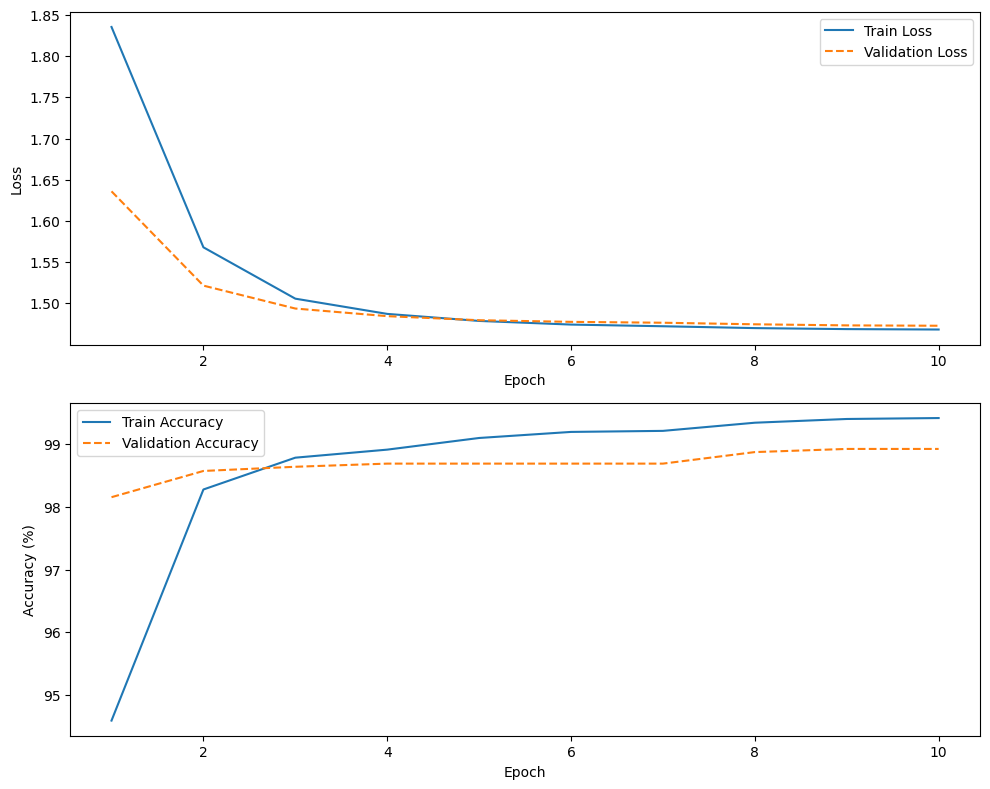

In [ ]:
# Plotting the loss and accuracy curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(range(1, epochs+1), train_losses, label='Train Loss')
ax1.plot(range(1, epochs+1), val_losses, label='Validation Loss', linestyle='dashed')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
ax2.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy', linestyle='dashed')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

plt.tight_layout()
plt.show()

# even here we achieved a 99.57% in test accuracy!

In [ ]:

model.eval()  # Set the model to evaluation mode
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for test_images, test_labels in test_dataloader:  # Assuming you have a DataLoader named 'test_loader'
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = model(test_images)
        test_loss += criterion(test_outputs, test_labels).item()
        _, test_predicted = torch.max(test_outputs, 1)
        test_total += test_labels.size(0)
        test_correct += (test_predicted == test_labels).sum().item()

average_test_loss = test_loss / len(test_dataloader)
test_accuracy = test_correct / test_total * 100

print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 1.4662, Test Accuracy: 99.57%
